# Module 5–Dimensionality Reduction

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import cross_val_score
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.decomposition import PCA

### Case Study I

In [30]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


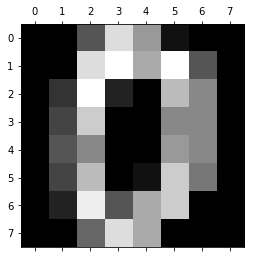

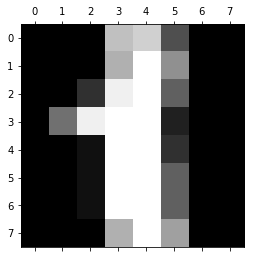

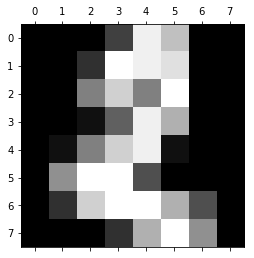

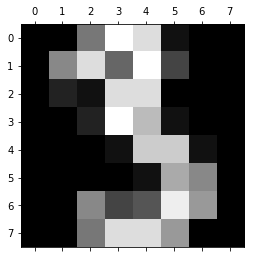

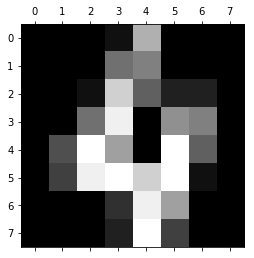

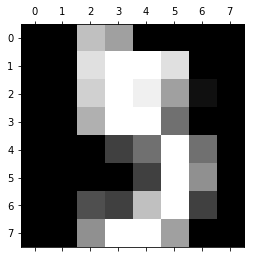

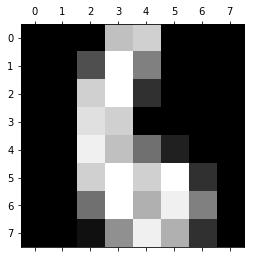

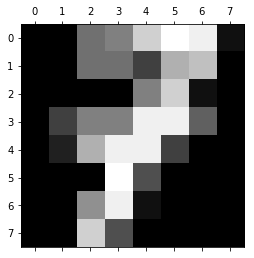

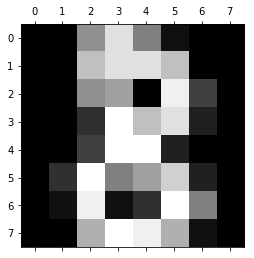

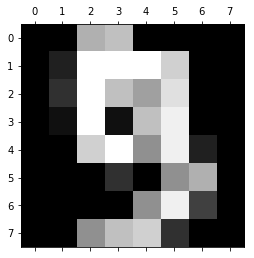

In [31]:
plt.gray() 
for i in range(0,10,1):
    plt.matshow(digits.images[i]) 
    plt.show()

In [32]:
digits_df = pd.DataFrame(digits.data)
digits_df.head()
#print(digits_df.shape)

0    1    2     3     4     5    6    7    8    9  ...    54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0 ...   5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0 ...   9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [33]:
from sklearn.preprocessing import OneHotEncoder
target_ohe = OneHotEncoder(sparse=False)
target_a = target_ohe.fit_transform(digits.target.reshape(-1,1))
target_df = pd.DataFrame(target_a)
print(target_df.head())
print(target_df.shape)

     0    1    2    3    4    5    6    7    8    9
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
(1797, 10)


In [34]:
train_X, test_X = train_test_split(digits_df, test_size = 0.2)
print(train_X.shape)
print(test_X.shape)
train_y, test_y = train_test_split(target_df, test_size = 0.2)
print(train_y.shape)
print(test_y.shape)

(1437, 64)
(360, 64)
(1437, 10)
(360, 10)


In [35]:
#Logistic Regression
logistic = LogisticRegression()
for i in range(0,10,1):
    logistic.fit(train_X,train_y[i])
    temp=logistic.predict(test_X)
    print(metrics.accuracy_score(temp,test_y[i])) # to check the accuracy

0.9138888888888889
0.9111111111111111
0.9027777777777778
0.8805555555555555
0.8944444444444445
0.8972222222222223
0.8833333333333333
0.8833333333333333
0.9166666666666666
0.9111111111111111


In [36]:
import numpy as np
pca = PCA()
pca.fit(digits_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

29


In [37]:
pca = PCA(n_components=29)
pca.fit(digits_df)

PCA(copy=True, iterated_power='auto', n_components=29, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
digits_2d = pca.transform(digits_df)
digits_df_2d = pd.DataFrame(digits_2d)
digits_df_2d.index = digits_df.index
digits_df_2d.columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                        'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20',
                        'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29']
digits_df_2d.head()

PC1        PC2       PC3        PC4        PC5       PC6       PC7  \
0  -1.259466  21.274883 -9.463055  13.014189  -7.128823 -7.440659  3.252837   
1   7.957611 -20.768699  4.439506 -14.893664   5.896249 -6.485622  2.126228   
2   6.991923  -9.955986  2.958558 -12.288302 -18.126023 -4.507664  1.843123   
3 -15.906105   3.332464  9.824372 -12.275838   6.965169  1.089483 -1.042085   
4  23.306867   4.269061 -5.675129 -13.851524  -0.358124 -2.857574 -0.720497   

         PC8       PC9       PC10    ...         PC20      PC21      PC22  \
0   2.553470 -0.581844   3.625696    ...    -3.461875  2.680480  1.008944   
1  -4.615937  3.587453  -1.074703    ...    -5.255599 -1.205387 -4.838523   
2 -16.415200  0.719232   4.255804    ...     8.732007  4.951561 -2.464175   
3  10.973556 -3.259733   6.498754    ...    -3.877173  0.269661  3.623555   
4  13.041696 -3.835414  13.414163    ...     5.035164  0.206765  5.740471   

       PC23      PC24      PC25      PC26      PC27      PC28      PC29  
0  2.011906  1.297423  1.183845  2.305190  3.683077 -0.937451 -1.133505  
1  0.857508 -2.977362  5.283720  0.109122  2.175049 -0.508953  2.308097  
2  5.999608  0.107884 -3.067211  0.150118  4.228981  2.144293  0.851327  
3  2.535969 -1.356835 -1.744483 -1.338766 -5.856251  4.683580 -1.122179  
4 -7.611264  3.991370  2.783104 -0.162367  0.488195  0.628936 -3.286513  

[5 rows x 29 columns]

In [39]:
print ((pca.explained_variance_ratio_).sum())
print (pca.explained_variance_ratio_)

0.9547952096503323
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017717 0.00905617 0.00889538 0.00797123 0.0076749  0.00722901
 0.00695874 0.00596027 0.00575593 0.00515136 0.00489528]


In [40]:
train2_X, test2_X = train_test_split(digits_df_2d, test_size = 0.2)
print(train2_X.shape)
print(test2_X.shape)
train2_y, test2_y = train_test_split(target_df, test_size = 0.2)
print(train2_y.shape)
print(test2_y.shape)

(1437, 29)
(360, 29)
(1437, 10)
(360, 10)


In [41]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
logistic = LogisticRegression()
for i in range(0,10,1):
    logistic.fit(train2_X,train2_y[i])
    temp=logistic.predict(test2_X)
    print(metrics.accuracy_score(temp,test2_y[i])) # to check the accuracy
    print(confusion_matrix(test2_y[i], temp))

0.9
[[324   0]
 [ 36   0]]
0.8916666666666667
[[321   0]
 [ 39   0]]
0.8916666666666667
[[321   0]
 [ 39   0]]
0.9111111111111111
[[328   0]
 [ 32   0]]
0.9166666666666666
[[330   0]
 [ 30   0]]
0.8833333333333333
[[318   0]
 [ 42   0]]
0.9166666666666666
[[330   0]
 [ 30   0]]
0.8805555555555555
[[317   0]
 [ 43   0]]
0.9222222222222223
[[332   0]
 [ 28   0]]
0.8861111111111111
[[319   0]
 [ 41   0]]


In [42]:
#from sklearn.lda import LDA
#print(sklearn.lda.__version__)

### Case Study II

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
digits_2d = lda.fit_transform(digits.data, digits.target)

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [44]:
train3_X, test3_X = train_test_split(digits_2d, test_size = 0.2)
print(train3_X.shape)
print(test3_X.shape)
train3_y, test3_y = train_test_split(target_df, test_size = 0.2)
print(train3_y.shape)
print(test3_y.shape)

(1437, 9)
(360, 9)
(1437, 10)
(360, 10)


In [45]:
#Logistic Regression
#from sklearn.metrics import confusion_matrix
logistic3 = LogisticRegression()
for i in range(0,10,1):
    logistic3.fit(train3_X,train3_y[i])
    temp3=logistic3.predict(test3_X)
    print(metrics.accuracy_score(temp3,test3_y[i])) # to check the accuracy
    print(confusion_matrix(test3_y[i], temp3))

0.875
[[315   0]
 [ 45   0]]
0.9166666666666666
[[330   0]
 [ 30   0]]
0.9277777777777778
[[334   0]
 [ 26   0]]
0.9
[[324   0]
 [ 36   0]]
0.8916666666666667
[[321   0]
 [ 39   0]]
0.9083333333333333
[[327   0]
 [ 33   0]]
0.8944444444444445
[[322   0]
 [ 38   0]]
0.9027777777777778
[[325   0]
 [ 35   0]]
0.8638888888888889
[[311   0]
 [ 49   0]]
0.9194444444444444
[[331   0]
 [ 29   0]]


### Case Study III

In [46]:
cancer_df = pd.read_csv('breast-cancer-data.csv', index_col = 0)
#existing_df.index.names = ['stations']
#existing_df.columns.names = ['months']
#existing_df = existing_df.fillna(15)
#existing_df.head()
pred_var = cancer_df.columns
pred_var = pred_var.drop('diagnosis')
print(pred_var)
cancer_df.head()

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean           ...             \
id                                                     ...              
842302                0.14710         0.2419           ...              
842517                0.07017         0.1812           ...              
84300903              0.12790         0.2069           ...              
84348301              0.10520         0.2597           ...              
84358402              0.10430         0.1809           ...              

          radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                   
842302           25.38          17.33           184.60      2019.0   
842517           24.99          23.41           158.80      1956.0   
84300903         23.57          25.53           152.50      1709.0   
84348301         14.91          26.50            98.87       567.7   
84358402         22.54          16.67           152.20      1575.0   

          smoothness_worst  compactness_worst  concavity_worst  \
id                                                               
842302              0.1622             0.6656           0.7119   
842517              0.1238             0.1866           0.2416   
84300903            0.1444             0.4245           0.4504   
84348301            0.2098             0.8663           0.6869   
84358402            0.1374             0.2050           0.4000   

          concave points_worst  symmetry_worst  fractal_dimension_worst  
id                                                                       
842302                  0.2654          0.4601                  0.11890  
842517                  0.1860          0.2750                  0.08902  
84300903                0.2430          0.3613                  0.08758  
84348301                0.2575          0.6638                  0.17300  
84358402                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [47]:
#from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
pca3.fit(cancer_df[pred_var])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
cancer_2d = pca3.transform(cancer_df[pred_var])
cancer_df_2d = pd.DataFrame(cancer_2d)
cancer_df_2d.index = cancer_df.index
cancer_df_2d.columns = ['PC1','PC2']
cancer_df_2d.head()

PC1         PC2
id                               
842302    1160.142574 -293.917544
842517    1269.122443   15.630182
84300903   995.793889   39.156743
84348301  -407.180803  -67.380320
84358402   930.341180  189.340742

In [49]:
print (pca3.explained_variance_ratio_)

[0.98204467 0.01617649]
